In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import fashion_mnist
from PIL import Image 
from sklearn.model_selection import train_test_split

In [2]:
(x_train,y_train),(x_test, y_test) = fashion_mnist.load_data() 

In [3]:
x_train = x_train / 255
x_test =x_test/255

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
x_train_d, x_val, y_train_d, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Data augmentation to help with overfitting
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

In [9]:
# Early stopping to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [10]:
history = model.fit(x_train_d, y_train_d, epochs=15, validation_data=(x_val, y_val),callbacks=early_stopping)

Epoch 1/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.4760 - accuracy: 0.8279 - val_loss: 0.3712 - val_accuracy: 0.8630
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3229 - accuracy: 0.8822 - val_loss: 0.3002 - val_accuracy: 0.8912
Epoch 3/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2763 - accuracy: 0.8990 - val_loss: 0.2743 - val_accuracy: 0.9017
Epoch 4/15
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2447 - accuracy: 0.9110 - val_loss: 0.2570 - val_accuracy: 0.9078
Epoch 5/15
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2156 - accuracy: 0.9206 - val_loss: 0.2698 - val_accuracy: 0.9028
Epoch 6/15
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1963 - accuracy: 0.9263 - val_loss: 0.2705 - val_accuracy: 0.9008
Epoch 7/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1760 - accuracy: 0.9336 - val_loss: 0.2568 - v

313/313 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.9076
Test Loss: 0.2630983293056488
Test Accuracy: 0.9075999855995178


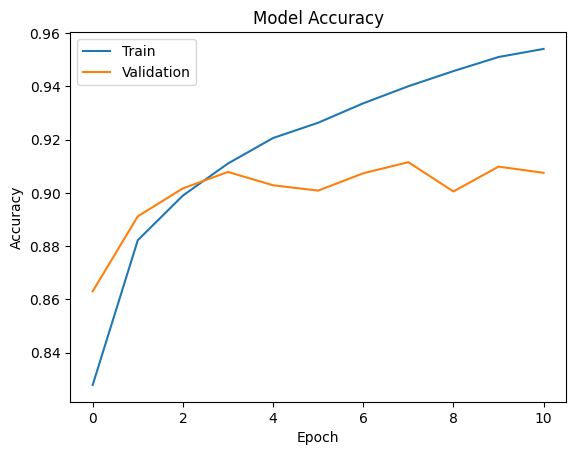

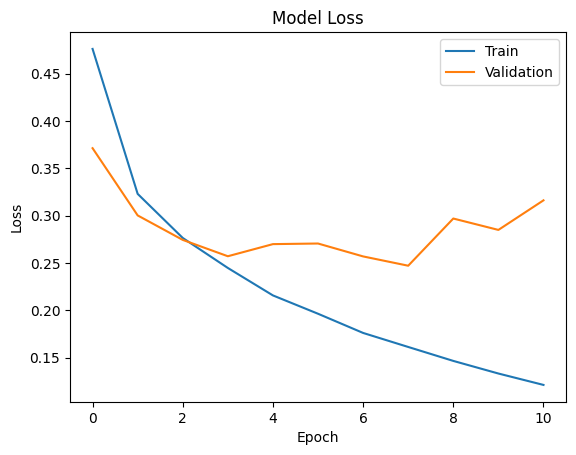

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()